In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
#For lag and long of the position 
from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\Credit card Fraud\fraudTrain.csv")
test = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\Credit card Fraud\fraudTest.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

0 --> Normal Transactions  
1 --> Fraud Transactions 

In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


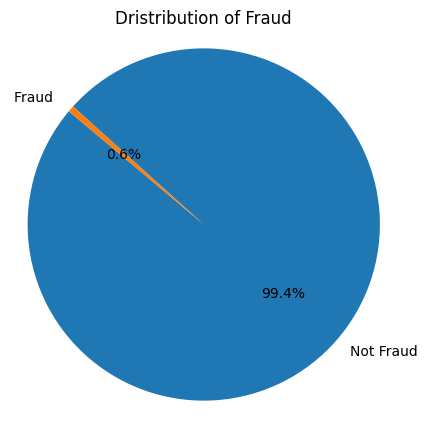

In [9]:
#Graph that show the fraud vs Not Fraud
plt.figure(figsize=(5,5))
labels = ['Not Fraud','Fraud ']
values = train.is_fraud.value_counts()
plt.pie(values,labels= labels,autopct="%1.1f%%",startangle=140)
plt.title("Dristribution of Fraud")
plt.axis("equal")
plt.show()

In [10]:
train['dob'] = pd.to_datetime(train['dob'])
test['trans_date_trans_time'] =pd.to_datetime(train['trans_date_trans_time'])

In [11]:
train[train['is_fraud']== 1]['job'].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

In [12]:
train['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

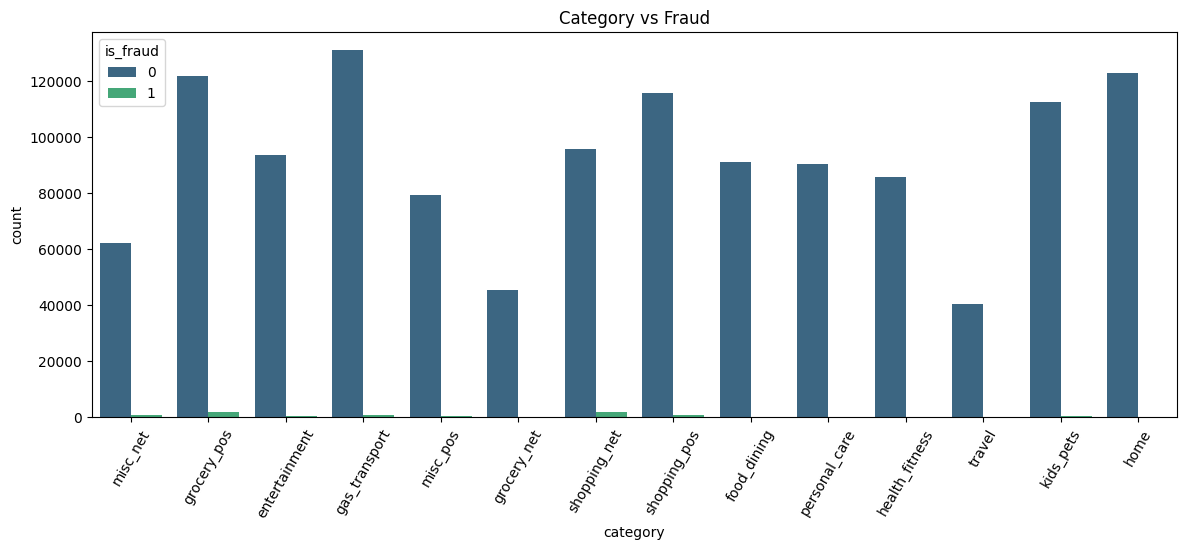

In [13]:
#Graph to show transaction related to each category
plt.figure(figsize=(14,5))
sns.countplot(x='category',hue='is_fraud',data=train,palette='viridis')
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

In [14]:
train['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

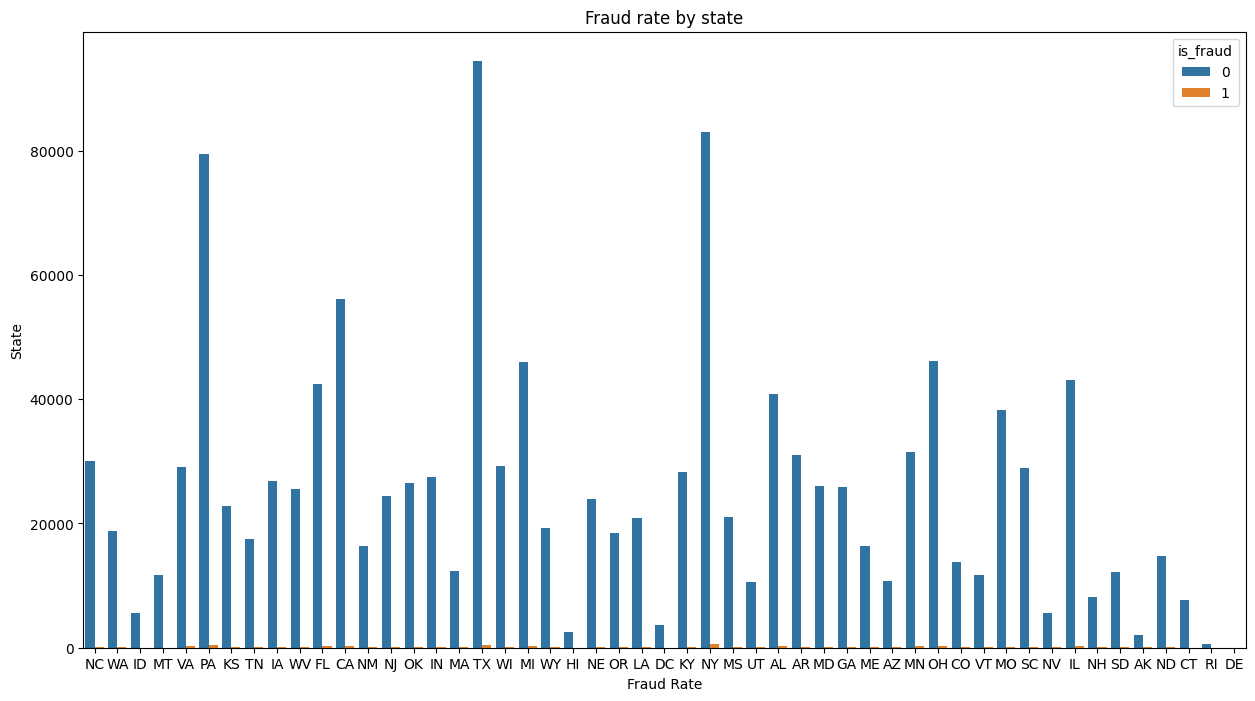

In [15]:
#Fraud rate by state 
plt.figure(figsize=(15,8))
sns.countplot(x='state', hue='is_fraud', data=train)
plt.title("Fraud rate by state")
plt.xlabel("Fraud Rate")
plt.ylabel("State")
plt.show()

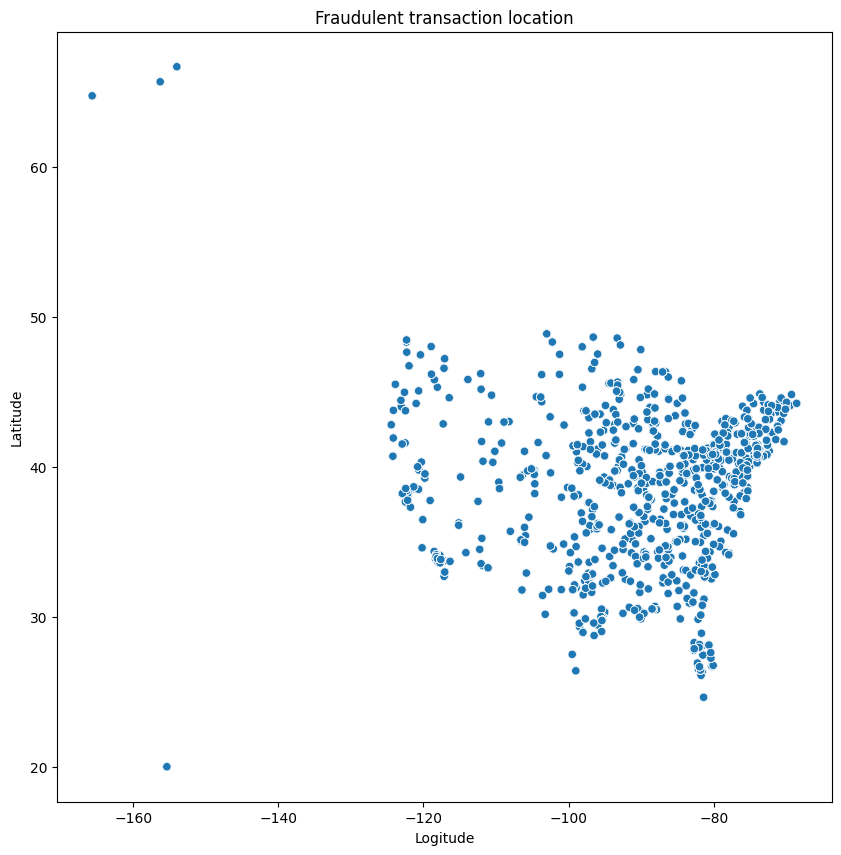

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train[train['is_fraud']== 1],x='long',y='lat',hue='is_fraud',legend=False)
plt.title("Fraudulent transaction location")
plt.xlabel('Logitude')
plt.ylabel('Latitude')
plt.show()

We will use Kmeans clusters to add location column

In [17]:
coords = train[['lat','long']]
march_coords = train[['merch_lat','merch_long']]
coords1 = test[['lat','long']]
march_coords1 = test[['merch_lat','merch_long']]

#Fit the lat and long in Kmean model
kmeans = KMeans(n_clusters=10,random_state=10).fit(coords)
kmeans_march = KMeans(n_clusters=10,random_state=10).fit(march_coords)
kmeans1 = KMeans(n_clusters=10,random_state=10).fit(coords1)
kmeans_march1 = KMeans(n_clusters=10,random_state=10).fit(march_coords1)

train['location_cluster'] = kmeans.labels_
train['location_cluster_march'] = kmeans_march.labels_
test['location_cluster'] = kmeans1.labels_
test['location_cluster_march'] = kmeans_march1.labels_

In [18]:
#The columns we dont need
train.drop(columns=['first','last','dob','state','long','lat','merch_lat','merch_long','cc_num','city','street','zip','trans_num'],inplace=True)
test.drop(columns=['first','last','dob','state','long','lat','merch_lat','merch_long','cc_num','city','street','zip','trans_num'],inplace=True)

In [19]:
#Now we will standadies the data for futher use 
categorical_data = ['job','merchant','category','gender']
numerical_data = ['amt','unix_time','city_pop','location_cluster','location_cluster_march']


In [20]:
#This is for Label encoder the categorical Data
encoder = LabelEncoder()

for col in categorical_data :
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.fit_transform(test[col])

In [21]:
required_col  = numerical_data+ categorical_data 
result = 'is_fraud'

In [22]:
#Standard Scaler for the numerical and label data

scaler  = StandardScaler()

train[required_col] = scaler.fit_transform(train[required_col])
test[required_col] = scaler.fit_transform(test[required_col])

In [23]:
x = train[required_col]
x_test = test[required_col]
y = train[result]
y_test = test[result]

# Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [25]:
#Now we will try train model to check its accuracy 
pred = model.predict(x)
accuracy = accuracy_score(y,pred)
print("Accuracy of the train data is: ", accuracy)

Accuracy of the train data is:  0.993649912275628


In [26]:
#Now we will try test model to check its accuracy 
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("Accuracy of the test data is: ", accuracy)

Accuracy of the test data is:  0.9954851282752614


# Random Forest

In [30]:
model = RandomForestClassifier(n_estimators=400)
model.fit(x,y)

RandomForestClassifier(n_estimators=400)

In [31]:
##Now we will try train model to check its accuracy 
pred = model.predict(x)
accuracy = accuracy_score(y,pred)
print("Accuracy of the train data is: ", accuracy)

Accuracy of the train data is:  1.0


In [32]:
#Now we will try test model to check its accuracy 
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("Accuracy of the test data is: ", accuracy)

Accuracy of the test data is:  0.9976139019900345


# Decision Trees

In [34]:
model = DecisionTreeClassifier(criterion='entropy',random_state= 10)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [35]:
##Now we will try train model to check its accuracy 
pred = model.predict(x)
accuracy = accuracy_score(y,pred)
print("Accuracy of the train data is: ", accuracy)

Accuracy of the train data is:  1.0


In [36]:
#Now we will try test model to check its accuracy 
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("Accuracy of the test data is: ", accuracy)

Accuracy of the test data is:  0.9960195710421994
